In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  2.0.0


In [8]:
df = pd.read_csv("Copy of AMESHousing.csv", na_values = ["-","."])
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [35]:
df.dropna()

Empty DataFrame
Columns: [Order, PID, MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Alley, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Pool QC, Fence, Misc Feature, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

[0 rows x 82 columns]

In [36]:
df.describe()

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

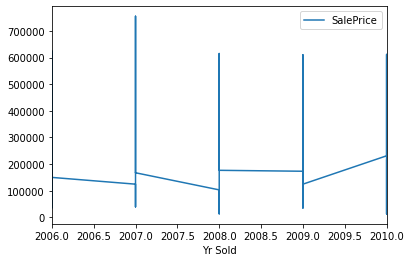

In [37]:
df.plot(x = "Yr Sold", y = "SalePrice")

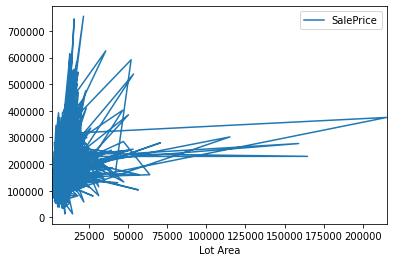

In [38]:
df.plot(x = "Lot Area", y = "SalePrice")

Text(0, 0.5, 'Sale Price')

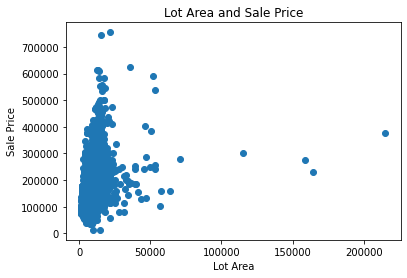

In [39]:
plt.scatter( x = "Lot Area", y = "SalePrice", data = df)
plt.title("Lot Area and Sale Price")
plt.xlabel("Lot Area")
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

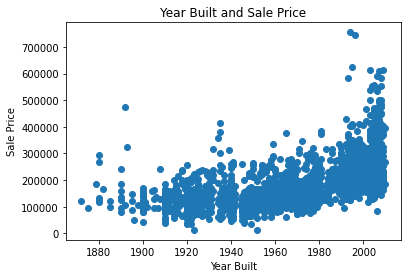

In [40]:
plt.scatter( x = "Year Built", y = "SalePrice", data = df)
plt.title("Year Built and Sale Price")
plt.xlabel("Year Built")
plt.ylabel('Sale Price')

Text(0, 0.5, 'Lot Area')

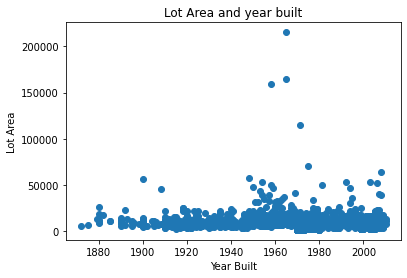

In [41]:
plt.scatter( x = "Year Built", y = "Lot Area", data = df)
plt.title("Lot Area and year built")
plt.xlabel("Year Built")
plt.ylabel('Lot Area')

C:\Users\thees\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\thees\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\thees\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\thees\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BC92C43648>,
      dtype=object)

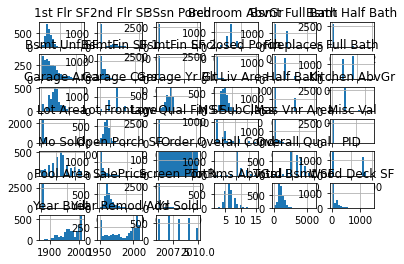

In [42]:
df.hist(bins = 20)

In [43]:
df.corr()

Order       PID  MS SubClass  Lot Frontage  Lot Area  \
Order            1.000000  0.173593     0.011797     -0.007034  0.031354   
PID              0.173593  1.000000    -0.001281     -0.096918  0.034868   
MS SubClass      0.011797 -0.001281     1.000000     -0.420135 -0.204613   
Lot Frontage    -0.007034 -0.096918    -0.420135      1.000000  0.491313   
Lot Area         0.031354  0.034868    -0.204613      0.491313  1.000000   
Overall Qual    -0.048500 -0.263147     0.039419      0.212042  0.097188   
Overall Cond    -0.011054  0.104451    -0.067349     -0.074448 -0.034759   
Year Built      -0.052319 -0.343388     0.036579      0.121562  0.023258   
Year Remod/Add  -0.075566 -0.157111     0.043397      0.091712  0.021682   
Mas Vnr Area    -0.030907 -0.229283     0.002730      0.222407  0.126830   
BsmtFin SF 1    -0.032321 -0.098375    -0.060075      0.215583  0.191555   
BsmtFin SF 2    -0.002773 -0.001145    -0.070946      0.045999  0.083150   
Bsmt Unf SF      0.005780 -0.087707    -0.130421      0.116743  0.023658   
Total Bsmt SF   -0.028719 -0.189642    -0.219445      0.353773  0.253589   
1st Flr SF      -0.013201 -0.141902    -0.247828      0.457391  0.332235   
2nd Flr SF      -0.000417 -0.003289     0.304237      0.029187  0.032996   
Low Qual Fin SF  0.013589  0.056940     0.025765      0.005249  0.000812   
Gr Liv Area     -0.009342 -0.107579     0.068061      0.383822  0.285599   
Bsmt Full Bath  -0.042539 -0.037759     0.013701      0.108915  0.125877   
Bsmt Half Bath   0.024978  0.004328    -0.003329     -0.024724  0.026903   
Full Bath       -0.044985 -0.171431     0.134631      0.184521  0.127433   
Half Bath       -0.039749 -0.166636     0.175879      0.041880  0.035497   
Bedroom AbvGr    0.015424  0.006345    -0.019208      0.240442  0.136569   
Kitchen AbvGr   -0.017685  0.076470     0.257698      0.005407 -0.020301   
TotRms AbvGrd    0.002612 -0.068981     0.031898      0.353137  0.216597   
Fireplaces      -0.019156 -0.108056    -0.049955      0.257255  0.256989   
Garage Yr Blt   -0.051160 -0.256829     0.088754      0.076306 -0.008952   
Garage Cars     -0.036185 -0.237484    -0.045883      0.308706  0.179512   
Garage Area     -0.035435 -0.210606    -0.103239      0.358505  0.212822   
Wood Deck SF    -0.011292 -0.051135    -0.017310      0.120084  0.157212   
Open Porch SF    0.016355 -0.071311    -0.014823      0.163040  0.103760   
Enclosed Porch   0.027908  0.162519    -0.022866      0.012758  0.021868   
3Ssn Porch      -0.024975 -0.024894    -0.037956      0.028564  0.016243   
Screen Porch     0.004307 -0.025735    -0.050614      0.076666  0.055044   
Pool Area        0.052518 -0.002845    -0.003434      0.173947  0.093775   
Misc Val        -0.006083 -0.008260    -0.029254      0.044476  0.069188   
Mo Sold          0.133365 -0.050455     0.000350      0.011085  0.003859   
Yr Sold         -0.975993  0.009579    -0.017905     -0.007547 -0.023085   
SalePrice       -0.031408 -0.246521    -0.085092      0.357318  0.266549   

                 Overall Qual  Overall Cond  Year Built  Year Remod/Add  \
Order               -0.048500     -0.011054   -0.052319       -0.075566   
PID                 -0.263147      0.104451   -0.343388       -0.157111   
MS SubClass          0.039419     -0.067349    0.036579        0.043397   
Lot Frontage         0.212042     -0.074448    0.121562        0.091712   
Lot Area             0.097188     -0.034759    0.023258        0.021682   
Overall Qual         1.000000     -0.094812    0.597027        0.569609   
Overall Cond        -0.094812      1.000000   -0.368773        0.047680   
Year Built           0.597027     -0.368773    1.000000        0.612095   
Year Remod/Add       0.569609      0.047680    0.612095        1.000000   
Mas Vnr Area         0.429418     -0.135340    0.313292        0.196928   
BsmtFin SF 1         0.284118     -0.050935    0.279870        0.151790   
BsmtFin SF 2        -0.041287      0.041134   -0.027415       -0.062129   
Bsmt

C:\Users\thees\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thees\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


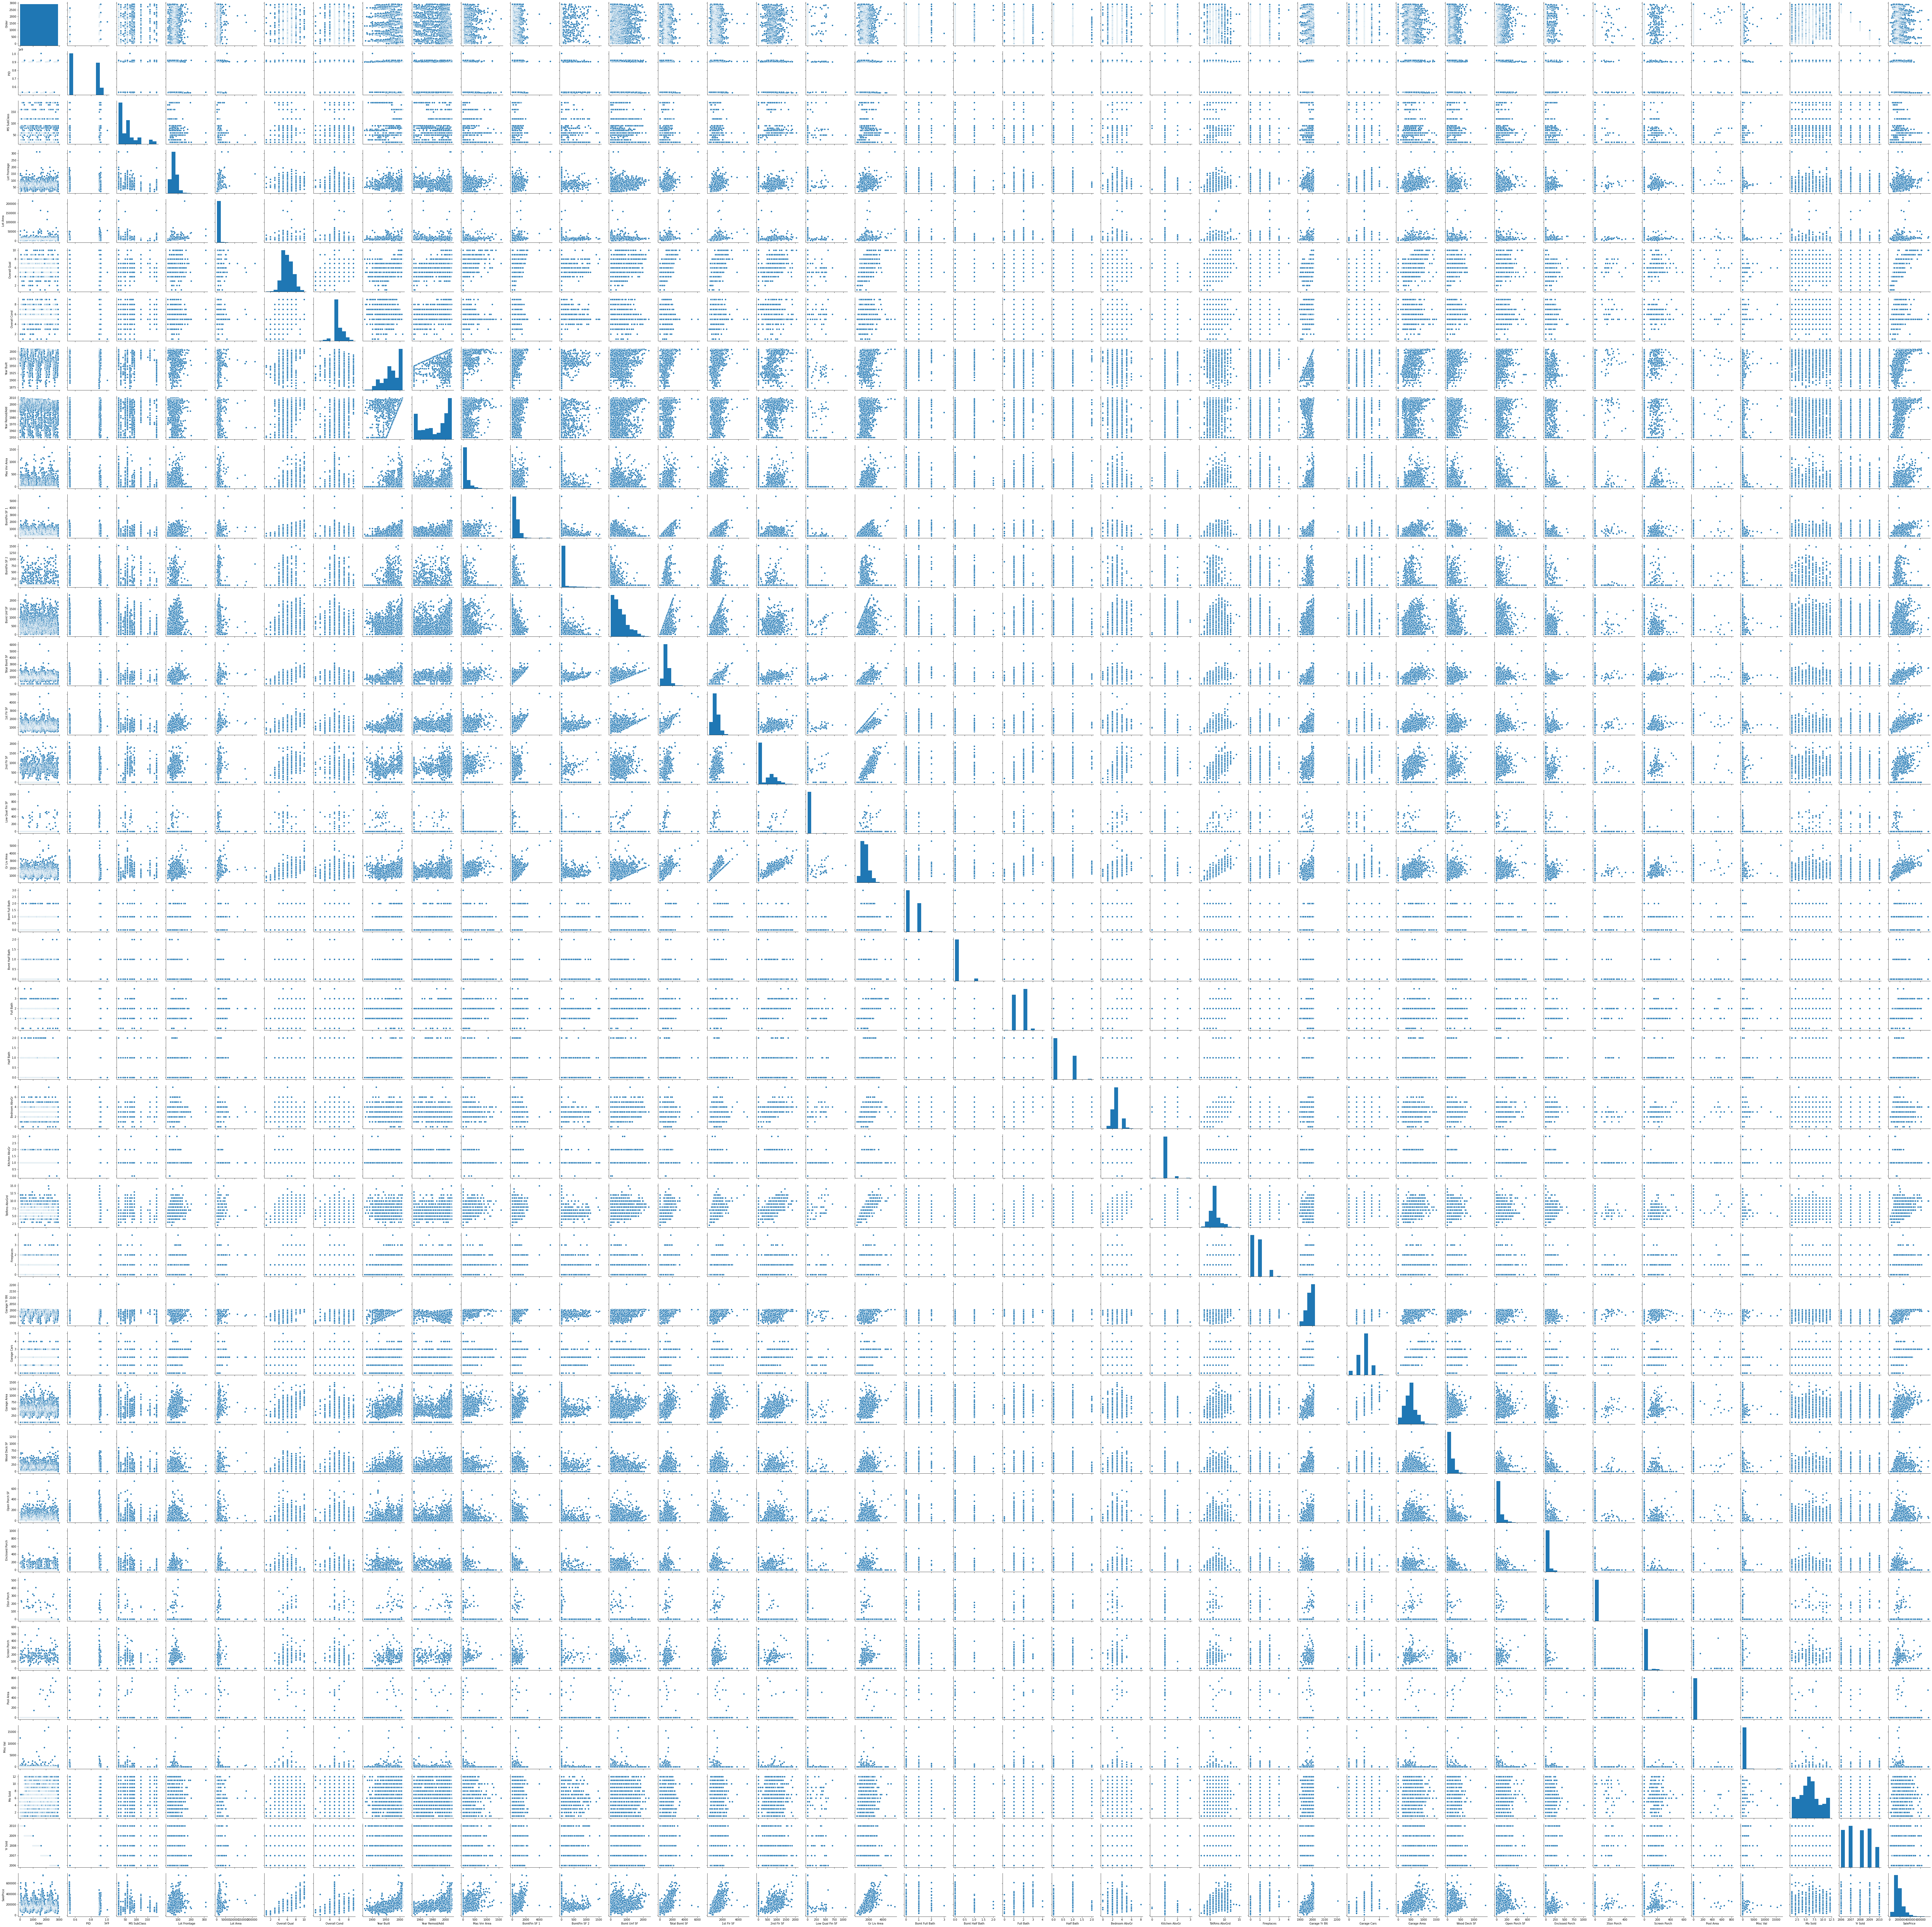

In [44]:
sns.pairplot(data = df)

In [51]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(df[['Lot Area']], df[['SalePrice']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(model_lr.coef_)
print(model_lr.intercept_)

[[2.70224462]]
[153373.89290717]


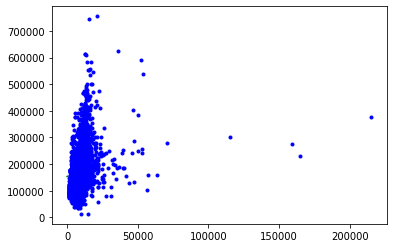

In [53]:
# Plot the data points and the optimal regression line.
m = model_lr.coef_[0, 0]   # slope
b = model_lr.intercept_[0] # y-intercept

plt.plot(df['Lot Area'], df['SalePrice'], 'b.')
x_coordinates = np.array([0,300])
y_coordinates = x_coordinates * m + b
plt.plot(x_coordinates, y_coordinates, 'g-')

df. round(n)
df. apply(lambda x: '%. nf' % x, axis=1)
pd. set_option('display. float_format', lambda x: '%. nf' % x)
pd. options. display. float_format= '{:. nf}'. format.

value=str('6,0865000000e-01')
value2=value. replace(',', '. ')
float(value2)

In [54]:
X = np.hstack([np.ones([2930, 1]), df[["Lot Area"]].values])
#value = str(X)
#value2 = value.replace(',','. ')
#print(float(value2))
print(X)

[[1.0000e+00 3.1770e+04]
 [1.0000e+00 1.1622e+04]
 [1.0000e+00 1.4267e+04]
 ...
 [1.0000e+00 1.0441e+04]
 [1.0000e+00 1.0010e+04]
 [1.0000e+00 9.6270e+03]]


In [55]:
y = df[["SalePrice"]].values
print(y)

[[215000]
 [105000]
 [172000]
 ...
 [132000]
 [170000]
 [188000]]


TypeError: show() got an unexpected keyword argument 'figsize'

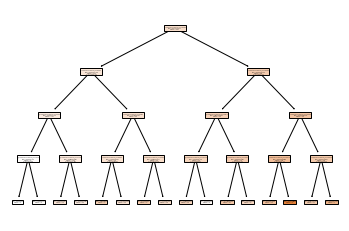

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree_reg = DecisionTreeRegressor(max_depth=4)
tree_reg.fit(X, y)

plot_tree(tree_reg, feature_names=X, filled=True)
plt.show(figsize=(10,10))

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_features.fit(X)
X_poly = poly_features.transform(X)

X_poly = poly_features.fit_transform(X) # X_poly contains data for Z1 and Z2

print(X_poly[:5])

[[1.00000000e+00 3.17700000e+04 1.00000000e+00 3.17700000e+04
  1.00933290e+09]
 [1.00000000e+00 1.16220000e+04 1.00000000e+00 1.16220000e+04
  1.35070884e+08]
 [1.00000000e+00 1.42670000e+04 1.00000000e+00 1.42670000e+04
  2.03547289e+08]
 [1.00000000e+00 1.11600000e+04 1.00000000e+00 1.11600000e+04
  1.24545600e+08]
 [1.00000000e+00 1.38300000e+04 1.00000000e+00 1.38300000e+04
  1.91268900e+08]]


In [58]:
# Use sci-kit learn to train the polynomial model.
from sklearn.linear_model import LinearRegression
model_pr = LinearRegression()
model_pr.fit(X_poly, y)
# What we actually solved is a linear model on Z1 and Z2
# We know that it is equivalent to a degree-2 polynomial model on X.
print(model_pr.coef_, model_pr.intercept_)

[[ 0.00000000e+00  3.12238978e+00 -8.88178420e-16  3.12238978e+00
  -2.92153886e-05]] [122246.63617255]


In [59]:
def mean_squared_error(y, prediction):
    """
    This function returns the squared error on Record i.
    """
    beta0 = 153373.89290717
    beta1 = 2.70224462 
    x = df.loc[1, 'Lot Area']
    y = df.loc[1, 'SalePrice']

    prediction = beta0 + beta1 * x

    squared_error = (y - prediction) ** 2

    return squared_error

In [60]:
predictions_pr = model_pr.predict(X_poly)
MSE_pr = mean_squared_error(y, predictions_pr)
print("MSE for degree-2 polynomial regression:", MSE_pr)

MSE for degree-2 polynomial regression: 6364749454.166589


ValueError: X shape does not match training shape

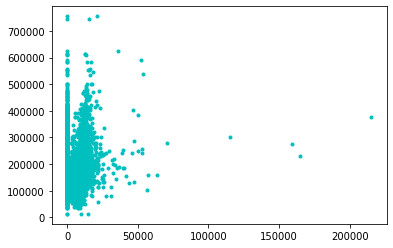

In [61]:
plt.plot(X, y, 'c.') # Plot points from training data
x_coordinates = np.linspace(-2930, 2930, 100) 
# Use the model to predict the corresponding y value
x_coordinates_poly = poly_features.transform(x_coordinates.reshape([-1, 1]))
y_coordinates = model_pr.predict(x_coordinates_poly)
# Plot the points
plt.plot(x_coordinates, y_coordinates, 'm-')

In [ ]:
# Build a decision tree
from sklearn.tree import DecisionTreeClassifier

#input_cols = df[:4]
X = np.hstack([np.ones([2930, 1]), df[["Lot Area"]].values])
y = df['SalePrice']
tree_c = DecisionTreeClassifier(max_depth=4,
                                  random_state=42)
tree_c.fit(X, y)

In [ ]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plot_tree(tree_c, feature_names=X, filled=True)
plt.show(figsize=(10,10))

In [9]:
dataset = pd.get_dummies(df, prefix='', prefix_sep='')
dataset.head()

Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0      1  526301100           20         141.0     31770             6   
1      2  526350040           20          80.0     11622             5   
2      3  526351010           20          81.0     14267             6   
3      4  526353030           20          93.0     11160             7   
4      5  527105010           60          74.0     13830             5   

   Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  New  Oth  VWD  \
0             5        1960            1960         112.0  ...    0    0    0   
1             6        1961            1961           0.0  ...    0    0    0   
2             6        1958            1958         108.0  ...    0    0    0   
3             5        1968            1968           0.0  ...    0    0    0   
4             5        1997            1998           0.0  ...    0    0    0   

   WD   Abnorml  AdjLand  Alloca  Family  Normal  Partial  
0    1        0        0       0       0       1        0  
1    1        0        0       0       0       1        0  
2    1        0        0       0       0       1        0  
3    1        0        0       0       0       1        0  
4    1        0        0       0       0       1        0  

[5 rows x 307 columns]

In [10]:
from sklearn.model_selection import train_test_split
df_train, temp = train_test_split(dataset, test_size=0.4)
df_validation, df_test = train_test_split(temp, test_size=0.5)

print("Train set:", df_train.shape)
print("Test set:", df_test.shape)
print("Validation set:", df_validation.shape)

Train set: (1758, 307)
Test set: (586, 307)
Validation set: (586, 307)


In [66]:
df_train.describe()

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  1758.000000  1.758000e+03  1758.000000   1474.000000    1758.000000   
mean   1481.290102  7.152530e+08    56.817406     69.704206   10267.711604   
std     849.903606  1.888633e+08    42.344620     23.281433    8346.502080   
min       5.000000  5.263020e+08    20.000000     21.000000    1300.000000   
25%     747.500000  5.284800e+08    20.000000     59.000000    7477.000000   
50%    1478.500000  5.354541e+08    50.000000     69.000000    9463.000000   
75%    2216.750000  9.071921e+08    70.000000     80.000000   11622.750000   
max    2930.000000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   1758.000000   1758.000000  1758.000000     1758.000000   1743.000000   
mean       6.091013      5.583049  1971.022753     1984.453356     99.639702   
std        1.420526      1.142986    30.082613       20.769018    177.835709   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.000000     1966.000000      0.000000   
50%        6.000000      5.000000  1972.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2000.000000     2004.000000    153.500000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...          New          Oth          VWD          WD       Abnorml  \
count  ...  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean   ...     0.083618     0.001706     0.000569     0.863481     0.063140   
std    ...     0.276892     0.041286     0.023850     0.343436     0.243284   
min    ...     0.000000     0.000000     0.000000     0.000000     0.000000   
25%    ...     0.000000     0.000000     0.000000     1.000000     0.000000   
50%    ...     0.000000     0.000000     0.000000     1.000000     0.000000   
75%    ...     0.000000     0.000000     0.000000     1.000000     0.000000   
max    ...     1.000000     1.000000     1.000000     1.000000     1.000000   

           AdjLand       Alloca       Family       Normal      Partial  
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000  
mean      0.003982     0.009101     0.018203     0.819681     0.085893  
std       0.062994     0.094992     0.133721     0.384562     0.280286  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     1.000000     0.000000  
50%       0.000000     0.000000     0.000000     1.000000     0.000000  
75%       0.000000     0.000000     0.000000     1.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 307 columns]

In [ ]:
pd.plotting.scatter_matrix(df_train, figsize=(15, 15))
plt.show()

In [ ]:
df_train_labels = df_train['SalePrice']
df_train_data = df_train.iloc[:, 1:]
df_train_data.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train_data)
df_train_scaled

In [ ]:
df_validation_data = df_validation.iloc[:, 1:]
df_validation_label = df_validation['SalePrice']
df_validation_scaled = scaler.transform(df_validation_data) # No need to fit since it will alter the means and stds
df_validation_scaled

In [ ]:

EPOCHS = 1000

history = model.fit(
  df_train_scaled, df_train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
)

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()